**EDA Preliminar de GoogleMaps-MetadataSitios**
--------------------------------

Se analiza un archivo representativo del DataSet **Metadat-Sitios** de Google Maps

**LIBRERIAS**

In [6]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import pyarrow as pa



**Metadata-Sitios**
---

In [7]:
sitiosdf=pd.read_json('../Proyecto Final/PG 03 Google & Yeld/Google Maps/metadata-sitios/1.json',lines=True)

In [13]:
sitiosdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275001 entries, 0 to 275000
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              274994 non-null  object 
 1   address           264939 non-null  object 
 2   gmap_id           275001 non-null  object 
 3   description       13155 non-null   object 
 4   latitude          275001 non-null  float64
 5   longitude         275001 non-null  float64
 6   category          272740 non-null  object 
 7   avg_rating        275001 non-null  float64
 8   num_of_reviews    275001 non-null  int64  
 9   price             13450 non-null   object 
 10  hours             192448 non-null  object 
 11  MISC              194972 non-null  object 
 12  state             195523 non-null  object 
 13  relative_results  238771 non-null  object 
 14  url               275001 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 31.5+ MB


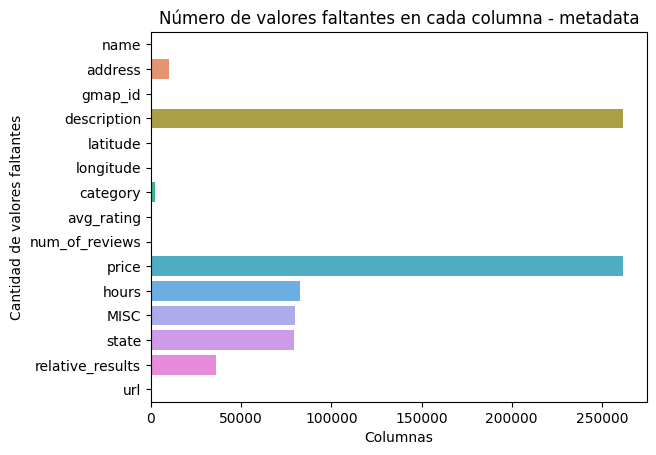

In [14]:
null_meta=sitiosdf.isna().sum()
sns.barplot(y=null_meta.index, x=null_meta.values, orient='h')
plt.title('Número de valores faltantes en cada columna - metadata')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores faltantes')
plt.show()

Para disminuir la carga de datos analizamos los datos nulos y posteriormente los eliminamos.
a continucion eliminamos las siguiente columnas que no aportan informacio debido aque sus datos sonb nulos y adiconal aumenta la carga del archivo.

In [15]:
sitiosdf.drop(columns=['description','price','hours','MISC','state','relative_results'],inplace=True)

Esta info nos abre un campo de visualizacion sobre la informacion que nos puede proporcionar este archivo de datos sin enmargo profundizaremos mucho mas con el analisis *Profiling Report*

In [16]:
ProfileReport(sitiosdf, title="SITIOS", explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

En el **Overview** nos reporta que tenemos 9 variables:
- **name**:    sin alerta de datos perdidos.
- **address**: sin alerta de datos perdidos.
- **gmap_id**: ID google maps, sin alerta de datos perdidos.
- **latitude**: sin alerta de datos perdidos.
- **longitude**: sin alerta de datos perdidos.
- **category**: alerta de datos perdidos. Rechazado 
- **avg_rating**: sin alerta de datos perdidos. 
- **num_of_reviews**:sin alerta de datos perdidos.
- **URL**: sin alerta de datos perdidos.

El reporte nos sugiere eliminar la columna **category** por datos faltanmtes e insoportados.

Vemos interacciones y correlaciones definidas entre las columnas **latitude**,  **longitude**, **avg_rating** y **num_of_reviews**, sugeridas por el ***Profiling Report***.

Tenemos la columna **gmap_id** en comun con la tabla de Reviews con la que se podria relacionar los archivos y ayudarnos a visualizar facilmente el Dashboard Final.





In [20]:
sitiosdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275001 entries, 0 to 275000
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            274994 non-null  object 
 1   address         264939 non-null  object 
 2   gmap_id         275001 non-null  object 
 3   latitude        275001 non-null  float64
 4   longitude       275001 non-null  float64
 5   avg_rating      275001 non-null  float64
 6   num_of_reviews  275001 non-null  int64  
 7   url             275001 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 16.8+ MB
